In [1]:
# using musae_facebook_target.csv as the target file
# using musae_facebook_edges.csv as the edge file
# using musae_facebook_features.json as the feature file

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp


# using networkx determine the most influential node
def most_influential_node(G):
    # calculate the degree of each node
    degree = nx.degree_centrality(G)
    # sort the degree of each node
    degree = sorted(degree.items(), key=lambda x: x[1], reverse=True)
    # return the most influential node
    return degree[0][0]


# read musae_facebook_target.csv in facebook_large folder
target = pd.read_csv('facebook_large/musae_facebook_target.csv')
# read musae_facebook_edges.csv
edges = pd.read_csv('facebook_large/musae_facebook_edges.csv')
# read musae_facebook_features.json
features = pd.read_json('facebook_large/musae_facebook_features.json', lines=True)

# create a networkx graph
G = nx.Graph()
# add nodes to the graph
G.add_nodes_from(target['id'])
# add edges to the graph
G.add_edges_from(edges.values)

labels_dict = {list(G.nodes)[i]: target['page_name'][i] for i in range(len(list(G.nodes)))}

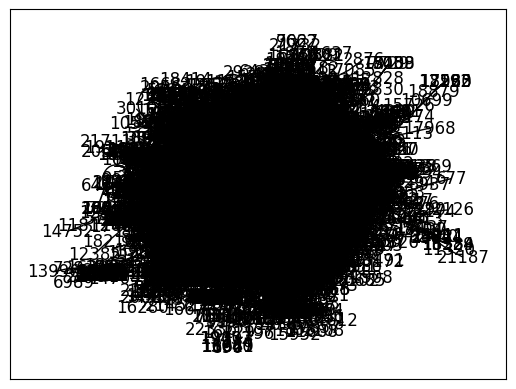

In [6]:
nx.draw_networkx(G, node_size=list(nx.pagerank(G).values()), labels=labels_dict, with_labels=True)

In [ ]:
# get the most influential node
most_influential = most_influential_node(G)
# get the most influential node's feature
most_influential_feature = features[features['id'] == most_influential].values[0][1:]
# get the most influential node's label
most_influential_label = target[target['id'] == most_influential].values[0][1]

# print the most influential node's feature
print(most_influential_feature)
# print the most influential node's label
print(most_influential_label)

# output
